Import the libraries

In [1]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

/home/jacobr/Documents/Masters/MSc_SML/scientific-machine-learning-project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Import data

In [7]:
path = 'data/ppi_merged.csv'
ppi_merged_df = pd.read_csv(path)

for col in ppi_merged_df.columns:
    print(col)

domain
sequence
normalized_length
normalized_abs_surf_acc
normalized_hydropathy_index
rel_surf_acc
prob_sheet
prob_helix
prob_coil
pssm_A
pssm_R
pssm_N
pssm_D
pssm_C
pssm_Q
pssm_E
pssm_G
pssm_H
pssm_I
pssm_L
pssm_K
pssm_M
pssm_F
pssm_P
pssm_S
pssm_T
pssm_W
pssm_Y
pssm_V
3_wm_normalized_abs_surf_acc
5_wm_normalized_abs_surf_acc
7_wm_normalized_abs_surf_acc
9_wm_normalized_abs_surf_acc
3_wm_normalized_hydropathy_index
5_wm_normalized_hydropathy_index
7_wm_normalized_hydropathy_index
9_wm_normalized_hydropathy_index
3_wm_rel_surf_acc
5_wm_rel_surf_acc
7_wm_rel_surf_acc
9_wm_rel_surf_acc
3_wm_prob_sheet
5_wm_prob_sheet
7_wm_prob_sheet
9_wm_prob_sheet
3_wm_prob_helix
5_wm_prob_helix
7_wm_prob_helix
9_wm_prob_helix
3_wm_prob_coil
5_wm_prob_coil
7_wm_prob_coil
9_wm_prob_coil
3_wm_pssm_A
3_wm_pssm_R
3_wm_pssm_N
3_wm_pssm_D
3_wm_pssm_C
3_wm_pssm_Q
3_wm_pssm_E
3_wm_pssm_G
3_wm_pssm_H
3_wm_pssm_I
3_wm_pssm_L
3_wm_pssm_K
3_wm_pssm_M
3_wm_pssm_F
3_wm_pssm_P
3_wm_pssm_S
3_wm_pssm_T
3_wm_pssm_W
3_wm_

Select columns for UMAP

In [11]:
n_aa_neighbors = 9  # Change this to change the columns for the subset!
wm_cols = [col for col in ppi_merged_df.columns if col.startswith(f"{n_aa_neighbors}_wm")]
extra_cols = []

umap_cols = wm_cols + extra_cols

ppi_umap_df = ppi_merged_df[umap_cols]

ppi_umap_df.head()

,9_wm_normalized_abs_surf_acc,9_wm_normalized_hydropathy_index,9_wm_rel_surf_acc,9_wm_prob_sheet,9_wm_prob_helix,9_wm_prob_coil,9_wm_pssm_A,9_wm_pssm_R,9_wm_pssm_N,9_wm_pssm_D,...,9_wm_pssm_L,9_wm_pssm_K,9_wm_pssm_M,9_wm_pssm_F,9_wm_pssm_P,9_wm_pssm_S,9_wm_pssm_T,9_wm_pssm_W,9_wm_pssm_Y,9_wm_pssm_V
0,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,...,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
1,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,...,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
2,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,...,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
3,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,...,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
4,0.302013,0.475309,0.442000,0.011000,0.282333,0.706778,0.443261,0.448653,0.293837,0.104806,...,0.293464,0.260189,0.466856,0.273184,0.341317,0.501061,0.517699,0.143632,0.117307,0.202106


Perform UMAP

In [22]:
n_nbors = 15  # Change this to change number of neighbors!
umap_model = umap.UMAP(n_neighbors=n_nbors, min_dist=0.1, n_components=2, random_state=42)
embedding = umap_model.fit_transform(ppi_umap_df)

/home/jacobr/Documents/Masters/MSc_SML/scientific-machine-learning-project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jacobr/Documents/Masters/MSc_SML/scientific-machine-learning-project/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Plot UMAP

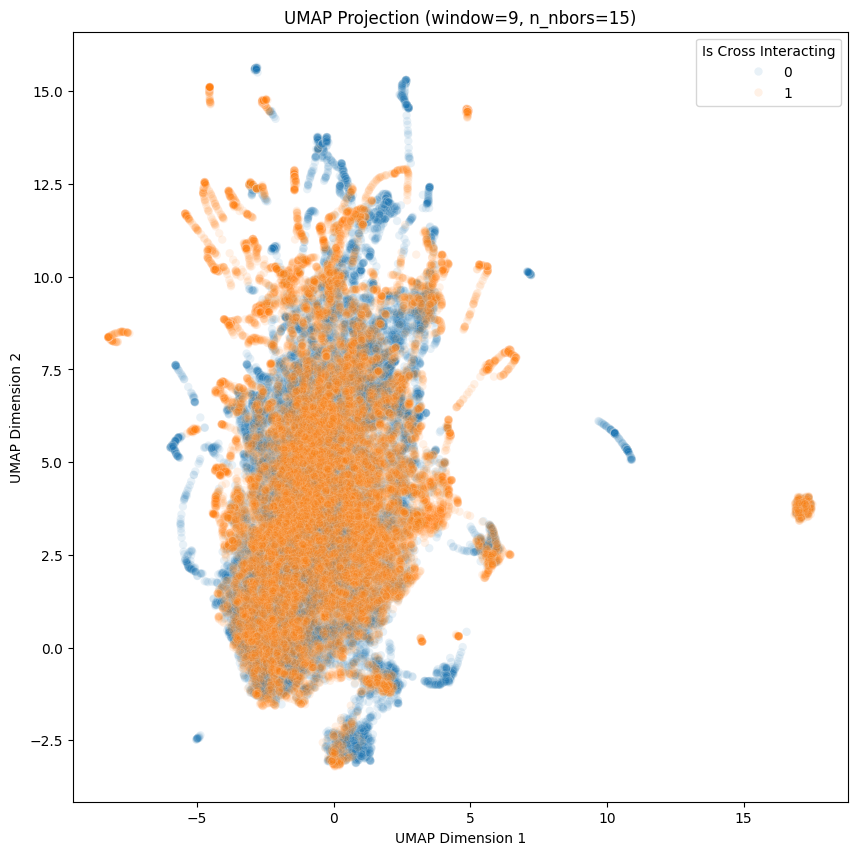

In [31]:
label_var = 'is_cross_interacting'  # Change this to change the coloring in the plot!

umap_result_df = pd.DataFrame(embedding, columns=["UMAP_1", "UMAP_2"])
umap_result_df["label"] = ppi_merged_df[label_var]

plt.figure(figsize=(10, 10))
sns.scatterplot(
    x="UMAP_1", y="UMAP_2", hue="label", data=umap_result_df, alpha=0.1
)
plt.title(f"UMAP Projection (window={n_aa_neighbors}, n_nbors={n_nbors})")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title=label_var.replace('_', ' ').title())
plt.show()

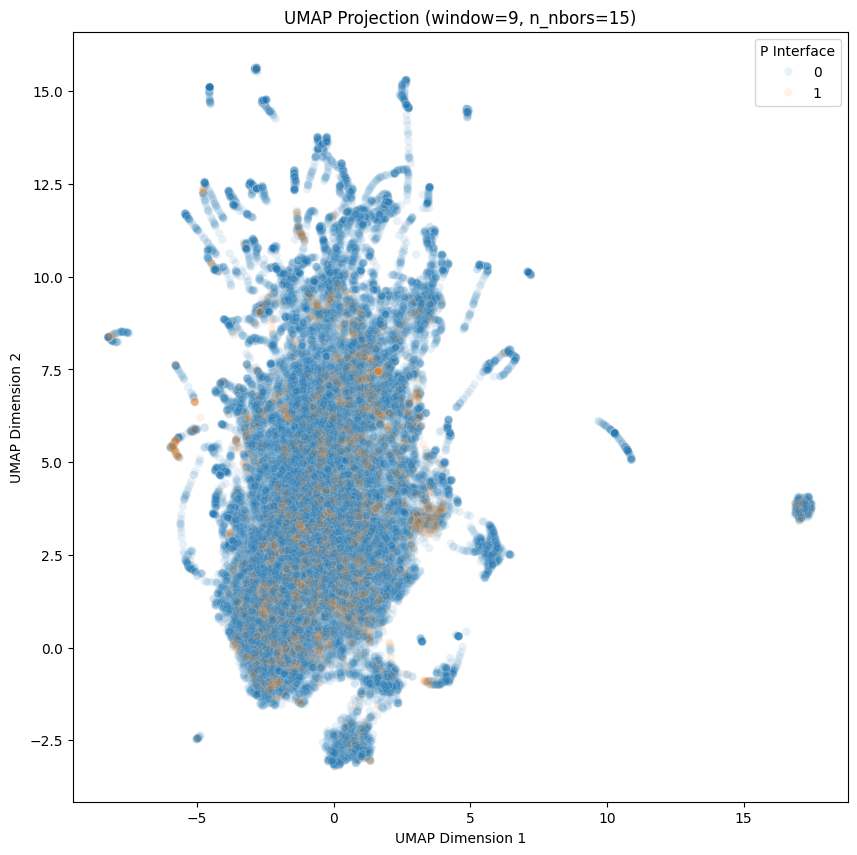

In [32]:
label_var = 'p_interface'  # Change this to change the coloring in the plot!

umap_result_df = pd.DataFrame(embedding, columns=["UMAP_1", "UMAP_2"])
umap_result_df["label"] = ppi_merged_df[label_var]

plt.figure(figsize=(10, 10))
sns.scatterplot(
    x="UMAP_1", y="UMAP_2", hue="label", data=umap_result_df, alpha=0.1
)
plt.title(f"UMAP Projection (window={n_aa_neighbors}, n_nbors={n_nbors})")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title=label_var.replace('_', ' ').title())
plt.show()

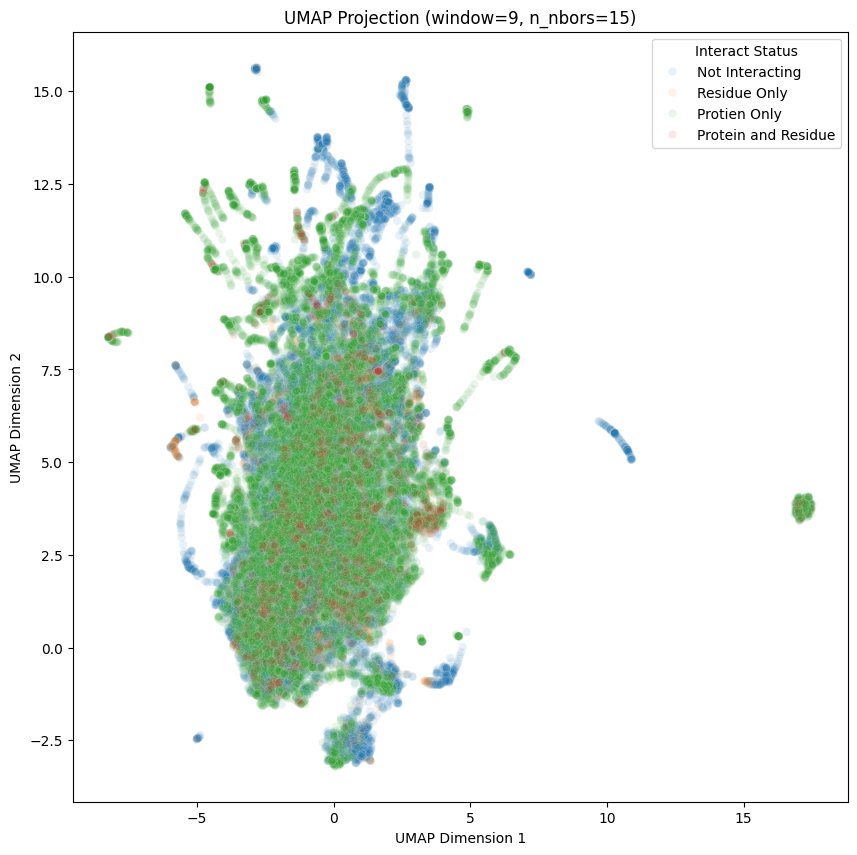

In [38]:
mapping = {
    (0, 0): "Not Interacting",
    (0, 1): "Protien Only",
    (1, 0): "Residue Only",
    (1, 1): "Protein and Residue"
}
ppi_merged_df['interact_status'] = ppi_merged_df.apply(lambda row: mapping[(row["p_interface"], row["is_cross_interacting"])], axis=1)

label_var = 'interact_status'  # Change this to change the coloring in the plot!

umap_result_df = pd.DataFrame(embedding, columns=["UMAP_1", "UMAP_2"])
umap_result_df["label"] = ppi_merged_df[label_var]

plt.figure(figsize=(10, 10))
sns.scatterplot(
    x="UMAP_1", y="UMAP_2", hue="label", data=umap_result_df, alpha=0.1
)
plt.title(f"UMAP Projection (window={n_aa_neighbors}, n_nbors={n_nbors})")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title=label_var.replace('_', ' ').title())
plt.show()

Creating a UMAP with only Not Interacting and Both

In [56]:
reduced_ppi_df = ppi_merged_df[(ppi_merged_df.interact_status == 'Not Interacting') | (ppi_merged_df.interact_status == 'Protein and Residue')]
reduced_umap_df = reduced_ppi_df[umap_cols]

n_nbors = 15  # Change this to change number of neighbors!
umap_model = umap.UMAP(n_neighbors=n_nbors, min_dist=0.1, n_components=2, random_state=42)
embedding = umap_model.fit_transform(reduced_umap_df)

/home/jacobr/Documents/Masters/MSc_SML/scientific-machine-learning-project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jacobr/Documents/Masters/MSc_SML/scientific-machine-learning-project/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [61]:
print(reduced_ppi_df.interact_status.value_counts())
print(f'{embedding.shape=}, total_resdues={reduced_ppi_df.interact_status.size}')

interact_status
Not Interacting        19081
Protein and Residue     2017
Name: count, dtype: int64
embedding.shape=(21098, 2), total_resdues=21098


Plot and color reduced UMAP

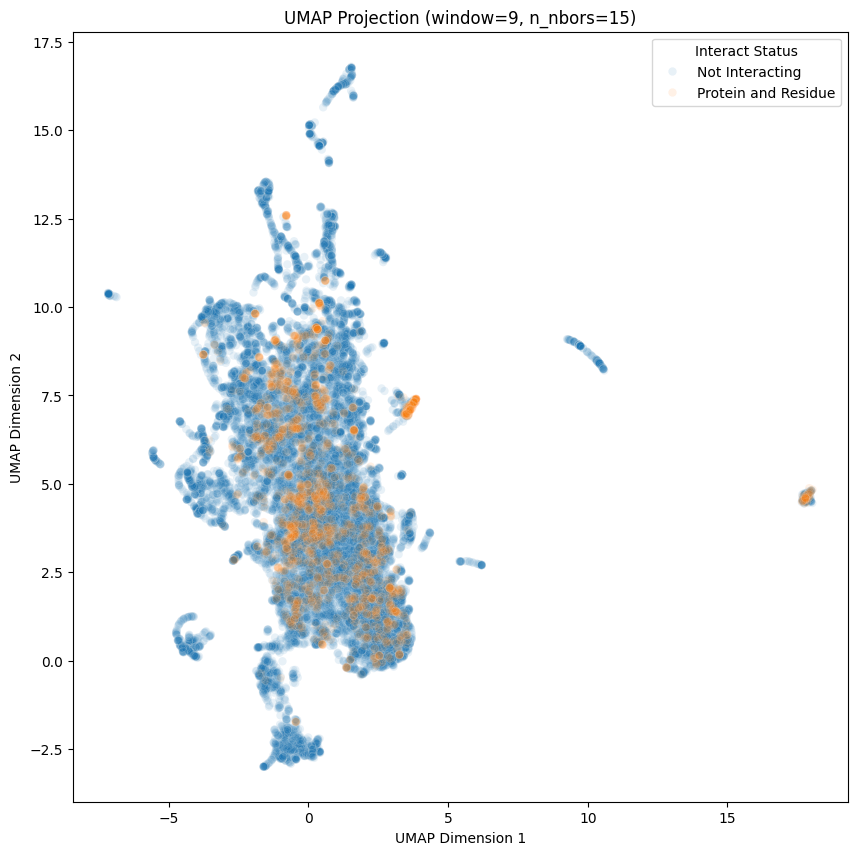

In [74]:
label_var = 'interact_status'  # Change this to change the coloring in the plot!

umap_result_df = pd.DataFrame(embedding, columns=["UMAP_1", "UMAP_2"])
umap_result_df["label"] = reduced_ppi_df.interact_status.values

plt.figure(figsize=(10, 10))
sns.scatterplot(
    x="UMAP_1", y="UMAP_2", hue="label", data=umap_result_df, alpha=0.1
)
plt.title(f"UMAP Projection (window={n_aa_neighbors}, n_nbors={n_nbors})")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title=label_var.replace('_', ' ').title())
plt.show()